<a href="https://colab.research.google.com/github/anmollate/DL/blob/main/Pipeline_Using_NN_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Refining the simple pipeline previously made

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [18]:
class model(nn.Module):

  def __init__(self,input_features, h1=5, h2=5, output_classes=3):
    #h1 -->hidden layer 1 consisting of 5 neurons
    #h2-->hidden layer 2 consisting of 5 neurons
    #their are 3 ouput classes for iris flower classification
    super().__init__()
    self.fc1=nn.Linear(input_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,output_classes)


  def forward(self,x):
    x=f.relu(self.fc1(x))
    x=f.relu(self.fc2(x))
    x=self.out(x)


    return x

In [19]:
model=model(input_features=4)

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv")
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df['target']=df['target'].replace('Iris-setosa',0.0)
df['target']=df['target'].replace('Iris-versicolor',1.0)
df['target']=df['target'].replace('Iris-virginica',2.0)

/tmp/ipython-input-3948750425.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target']=df['target'].replace('Iris-virginica',2.0)


In [7]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
#train test split
x=df.drop('target',axis=1)
y=df['target']

In [9]:
#converting x and y into numpy arrays
x=x.values
y=y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
#converting x values to float tensors
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)

In [13]:
#converting y values to long tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [34]:
#criterion for loss
criterion=nn.CrossEntropyLoss()

#Optimizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.03)

In [21]:
model.parameters

<bound method Module.parameters of model(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)>

In [37]:
#training the model
epochs=150
losses=[]

for i in range(epochs):
  y_pred=model.forward(x_train)

  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  print("Epoch:",i, "Loss: ",loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss:  tensor(0.0512, grad_fn=<NllLossBackward0>)
Epoch: 1 Loss:  tensor(0.0502, grad_fn=<NllLossBackward0>)
Epoch: 2 Loss:  tensor(0.0503, grad_fn=<NllLossBackward0>)
Epoch: 3 Loss:  tensor(0.0511, grad_fn=<NllLossBackward0>)
Epoch: 4 Loss:  tensor(0.0513, grad_fn=<NllLossBackward0>)
Epoch: 5 Loss:  tensor(0.0507, grad_fn=<NllLossBackward0>)
Epoch: 6 Loss:  tensor(0.0501, grad_fn=<NllLossBackward0>)
Epoch: 7 Loss:  tensor(0.0502, grad_fn=<NllLossBackward0>)
Epoch: 8 Loss:  tensor(0.0507, grad_fn=<NllLossBackward0>)
Epoch: 9 Loss:  tensor(0.0508, grad_fn=<NllLossBackward0>)
Epoch: 10 Loss:  tensor(0.0503, grad_fn=<NllLossBackward0>)
Epoch: 11 Loss:  tensor(0.0500, grad_fn=<NllLossBackward0>)
Epoch: 12 Loss:  tensor(0.0502, grad_fn=<NllLossBackward0>)
Epoch: 13 Loss:  tensor(0.0504, grad_fn=<NllLossBackward0>)
Epoch: 14 Loss:  tensor(0.0504, grad_fn=<NllLossBackward0>)
Epoch: 15 Loss:  tensor(0.0501, grad_fn=<NllLossBackward0>)
Epoch: 16 Loss:  tensor(0.0500, grad_fn=<NllLossBa

Text(0.5, 0, 'Epochs')

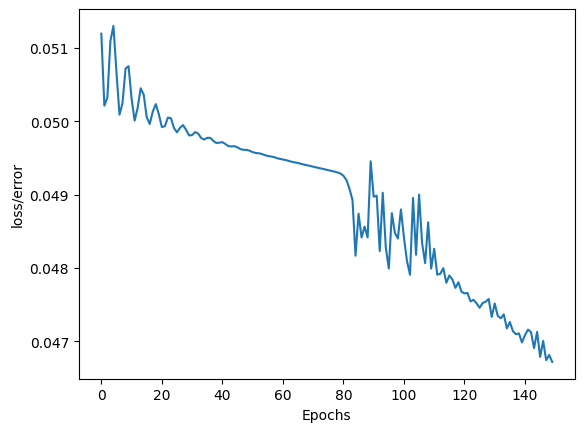

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")